In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

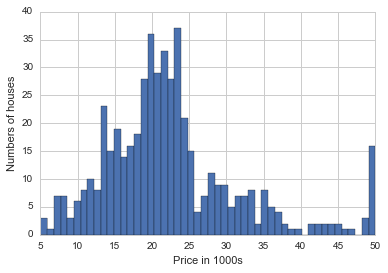

In [6]:
plt.hist(boston.target,bins=50)
plt.xlabel('Price in 1000s')
plt.ylabel('Numbers of houses')

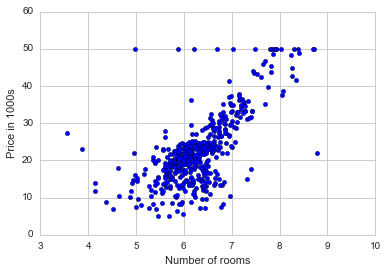

In [7]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in 1000s')
plt.xlabel('Number of rooms')

In [8]:
df = DataFrame(boston.data)
df.columns=boston.feature_names


In [9]:
df['Price'] = boston.target

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


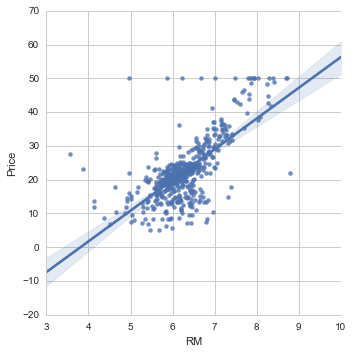

In [11]:
sns.lmplot('RM','Price',data=df)

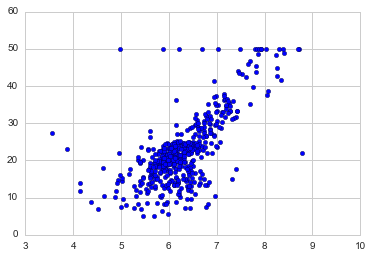

In [12]:
plt.scatter('RM','Price',data=df)

In [117]:
x=df.RM


In [118]:
x=np.vstack(df.RM)


In [119]:
y=df.Price

In [120]:
#y = np.array([[value,1] for value in y])

In [121]:
x = np.array([[value,1] for value in x])

In [122]:
m,b = np.linalg.lstsq(x,y)[0]


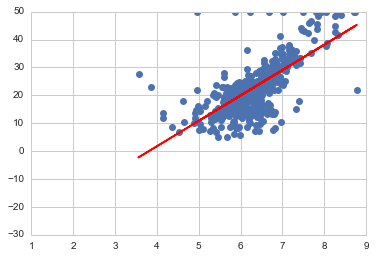

In [123]:
plt.plot(df.RM,df.Price,'o')
x=df.RM
x=np.vstack(df.RM)
x = np.array([[value,1] for value in x])
x
plt.plot(x,m*x+b,'r',label='Best Fit Line')

In [124]:

result = np.linalg.lstsq(x,y)
error_total=result[1]
rmse=np.sqrt(error_total/len(x))
rmse
#print ('The root mean square error was %.2f') %rmse

array([ 6.60307139])

In [125]:
import sklearn
from sklearn.linear_model import LinearRegression

In [126]:
lreg=LinearRegression()

In [127]:
x_multi=df.drop('Price',1)
y_target = df.Price

In [128]:
lreg.fit(x_multi,y_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
print('The estimated intercept coefficient is %.2f' %lreg.intercept_)
print('The estimated coeffiecent coefficient is %.2f' %len(lreg.coef_))

The estimated intercept coefficient is 36.49
The estimated coeffiecent coefficient is 13.00


In [130]:
coeff_df=DataFrame(df.columns)
coeff_df.columns=['Features']
coeff_df['Coefficient Estimate']=Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [131]:
X_train, X_test,Y_train, Y_test =sklearn.cross_validation.train_test_split(x,df.Price) 

In [132]:
X_train.shape
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [134]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
pred_train=lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [140]:
print("Fir a model X_train, and calculate MSE with Y_train: %.2f" % np.mean((Y_train-pred_train)**2))
print("Fir a model X_train, and calculate MSE X_test with Y_test: %.2f" % np.mean((Y_test-pred_test)**2))

Fir a model X_train, and calculate MSE with Y_train: 43.48
Fir a model X_train, and calculate MSE X_test with Y_test: 43.98


In [141]:
#plot observed value and predict vlaue

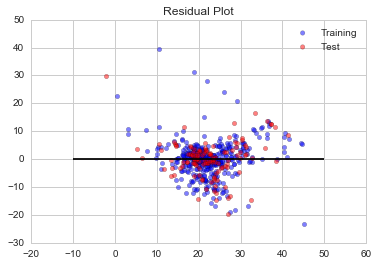

In [144]:
train=plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)
test =plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='upper right')
plt.title('Residual Plot')